STDLIB

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.io import ascii

Read in Data

In [90]:
data_path = './spectra_data/'

spiral_lambda, spiral_int = np.loadtxt(data_path + './NGC_1832-S-UBVR-k1992.txt', skiprows=2, usecols=(0,1), unpack=True)
ellip_lambda, ellip_int = np.loadtxt(data_path + './NGC_4648-S-UBVR-k1992.txt', skiprows=2, usecols=(0,1), unpack=True)
irr_lambda, irr_int = np.loadtxt(data_path + './NGC_1569-S-UBVR-k1992.txt', skiprows=2, usecols=(0,1), unpack=True)
quas_lambda, quas_int = np.loadtxt(data_path + './vanden_berk_2001_comp_quas.txt', skiprows=23, usecols=(0,1), unpack=True)

hst_path = '/Users/Alex/Desktop/Kassin_summer_2016/hst_filters/'
f435w, f435t = np.loadtxt(hst_path + 'f435w.WFC1.dat', usecols=(1, 2), unpack=True, skiprows=4)
f475w, f475t = np.loadtxt(hst_path + 'wfc_F475W.dat', usecols=(0, 1), unpack=True)
f555w, f555t = np.loadtxt(hst_path + 'wfc_F555W.dat', usecols=(0, 1), unpack=True)
f606w, f606t = np.loadtxt(hst_path + 'f606w.WFC1.dat', usecols=(1, 2), unpack=True, skiprows=4)
f775w, f775t = np.loadtxt(hst_path + 'f775w.WFC1.dat', usecols=(1, 2), unpack=True, skiprows=4)

a0v_lambda, a0v_int = np.loadtxt(data_path + './uka0v.dat', skiprows=3, usecols=(0,1), unpack=True)
g2v_lambda, g2v_int = np.loadtxt(data_path + './ukg2v.dat', skiprows=3, usecols=(0,1), unpack=True)
m2i_lambda, m2i_int = np.loadtxt(data_path + './ukm2i.dat', skiprows=3, usecols=(0,1), unpack=True)
m4v_lambda, m4v_int = np.loadtxt(data_path + './ukm4v.dat', skiprows=3, usecols=(0,1), unpack=True)
o5v_lambda, o5v_int = np.loadtxt(data_path + './uko5v.dat', skiprows=3, usecols=(0,1), unpack=True)

star_low, star_high = 501, 1250

dust_lambda, dust_cs = np.loadtxt(data_path + './draine_rv_3_1.txt', skiprows=80, usecols=(0, 3), unpack=True)
sol_ab_lambda, sol_ab_flux = np.loadtxt(data_path + './E490_00a_AM0.txt', skiprows=1, usecols=(0,1), unpack=True)
sol_below = ascii.read(data_path + './ASTMG173.csv')
sky_emiss_lambda, sky_emiss_flux = np.loadtxt(data_path + './skybg_50_10.dat.txt', skiprows=14, usecols=(0,1), unpack=True)
sky_ex_lambda, sky_ex_mag = np.loadtxt(data_path + './MKextinction.txt', skiprows=6, usecols=(0, 1), unpack=True)

u_l, u_s = np.loadtxt(data_path + './u.dat.txt', skiprows=6, usecols=(0, 3), unpack=True)
u_l_e, u_s_e = np.loadtxt(data_path + './u.dat.txt', skiprows=6, usecols=(0, 2), unpack=True)

g_l, g_s = np.loadtxt(data_path + './g.dat.txt', skiprows=6, usecols=(0, 3), unpack=True)
g_l_e, g_s_e = np.loadtxt(data_path + './g.dat.txt', skiprows=6, usecols=(0, 2), unpack=True)

r_l, r_s = np.loadtxt(data_path + './r.dat.txt', skiprows=6, usecols=(0, 3), unpack=True)
r_l_e, r_s_e = np.loadtxt(data_path + './r.dat.txt', skiprows=6, usecols=(0, 2), unpack=True)

i_l, i_s = np.loadtxt(data_path + './i.dat.txt', skiprows=6, usecols=(0, 3), unpack=True)
i_l_e, i_s_e = np.loadtxt(data_path + './i.dat.txt', skiprows=6, usecols=(0, 2), unpack=True)

In [75]:
# def plot_within_plot(xdata, ydata, ypos, textm, texty=np.mean(ydata), text_sz=15):
#     sp = plt.axes([.125, ypos, .775, 0.05])
#     sp.set_xlim(3100, 7600)
#     sp.semilogy(xdata, ydata, color='white')
#     sp.set_axis_bgcolor('black')
#     sp.axis('off')
#     sp.text(3200, texty, textm, color='white', size=text_sz)
    
print g_l[0]

3630.0


Plot

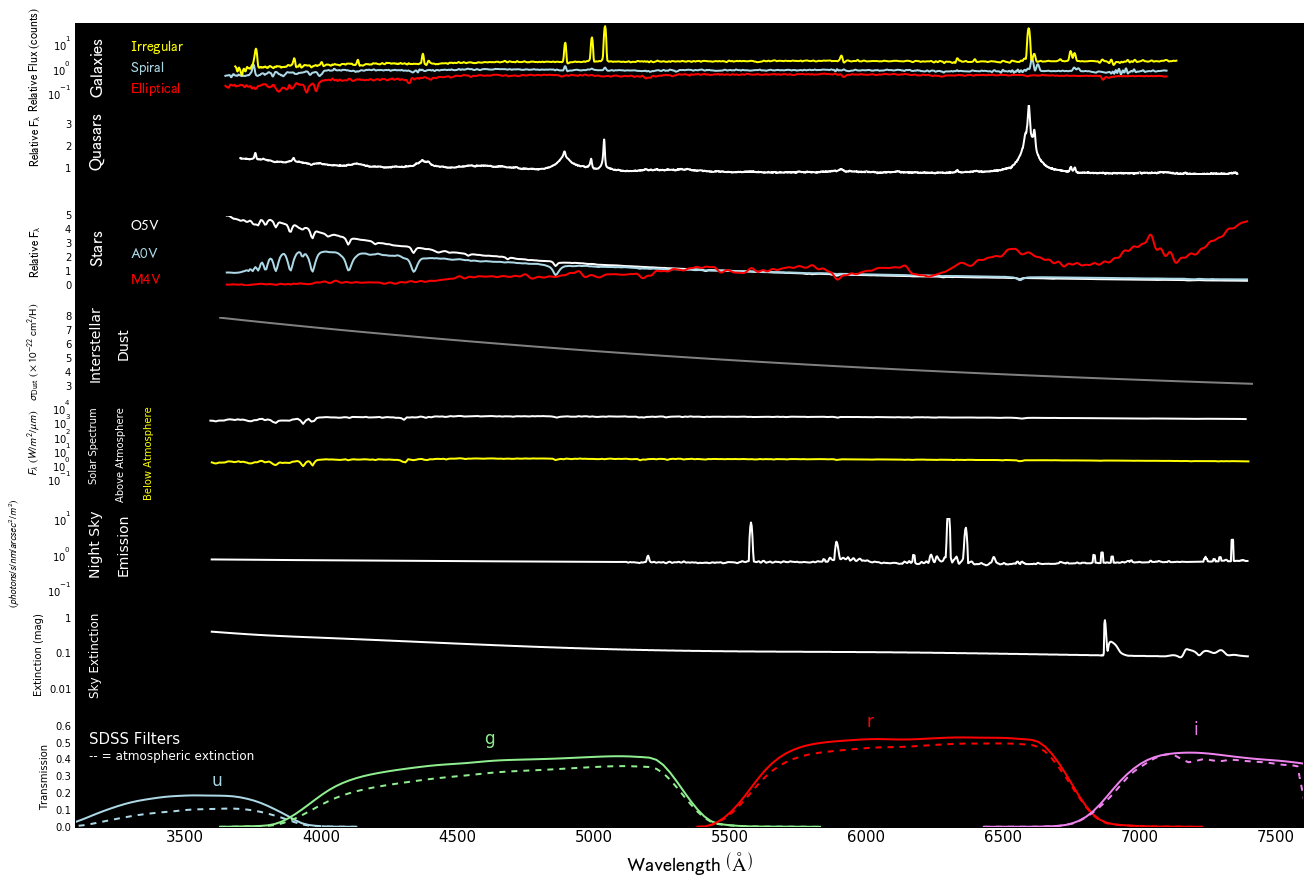

In [131]:
lbl_ft_sz = 18 # label font size
plot_lbl_ft_sz = 12

from matplotlib import rc # needed to modify TeX font; I don't like serif fonts too much
params = {'text.usetex': False, 'mathtext.fontset': 'stixsans'}
plt.rcParams.update(params)

fig = plt.figure(figsize=(22,14)) # create figure and set size - W, H, in inches
ax = plt.subplot(111) # add an axis object

ax.set_axis_bgcolor('black') # set background color to black
ax.set_xlim(3100, 7600)
ax.set_xticks(np.linspace(3500, 7500, 9))
#ax.set_ylim(0, max_y)
plt.setp(ax.get_xticklabels(), fontsize=15) # make x-axis tick marks larger
plt.setp(ax.get_yticklabels(), visible=False)
ax.set_xlabel(r'$\rm{Wavelength} \ \left(\AA \right)$', size=lbl_ft_sz + 2) # label x-axis
#ax.set_ylabel(r'$F_{\lambda} \ (\rm{arbitrary \ units})$', size=lbl_ft_sz)

# galaxy types
spg = plt.axes([.125, .85, .775, 0.07])
spg.set_xlim(3100, 7600)
spg.set_ylim(8e-2, 6e1)
spg.set_axis_bgcolor('black')
spg.set_ylabel(r'$\rm{Relative \ Flux \ (counts)}$', size=12)
#spg.spines['top'].set_color('white')
#spg.spines['bottom'].set_color('white')
spg.plot(spiral_lambda, 0.75 * spiral_int, color='lightblue', linewidth=2)
spg.plot(ellip_lambda, 0.5 * ellip_int, color='red', linewidth=2)
spg.semilogy(irr_lambda + 36, 1.75 * irr_int, color='yellow', linewidth=2)
spg.text(3300, 5, r'$\rm{Irregular}$', color='yellow', size=15)
spg.text(3300, .7, r'$\rm{Spiral}$', color='lightblue', size=15)
spg.text(3300, .1, r'$\rm{Elliptical}$', color='red', size=15)
spg.text(3150, 5, r'$\rm{Galaxies}$', color='white', size=18, rotation=90)
#spg.plot([6590, 6590], np.asarray(spg.get_ylim()), color='white', linestyle='--', linewidth=2, alpha=0.7)

# quasar
spq = plt.axes([.125, .77, .775, 0.07])
spq.set_xlim(3100, 7600)
spq.set_yticks([0, 1, 2, 3])
spq.yaxis.labelpad=23
spq.set_axis_bgcolor('black')
spq.set_ylabel(r'$\rm{Relative} \ F_{\lambda}$', size=12)
spq.plot(quas_lambda[2874:6530] + 30, quas_int[2874:6530], color='white', linewidth=2)
spq.text(3150, 3, r'$\rm{Quasars}$', color='white', size=18, rotation=90)
#spq.plot([6590, 6590], np.asarray(spq.get_ylim()), color='white', linestyle='--', linewidth=2, alpha=0.7)

# stars
sps = plt.axes([.125, .66, .775, 0.07])
sps.set_xlim(3100, 7600)
sps.set_axis_bgcolor('black')
sps.set_ylabel(r'$\rm{Relative} \ F_{\lambda}$', size=12)
sps.yaxis.labelpad=23
sps.plot(o5v_lambda[star_low:star_high], o5v_int[star_low:star_high], color='white', linewidth=2)
sps.plot(a0v_lambda[star_low:star_high], a0v_int[star_low:star_high], color='lightblue', linewidth=2)
sps.plot(m4v_lambda[star_low:star_high], m4v_int[star_low:star_high], color='red', linewidth=2)
sps.text(3150, 3, r'$\rm{Stars}$', color='white', size=18, rotation=90)
sps.text(3300, 4, r'$\rm{O5V}$', color='white', size=15)
sps.text(3300, 2, r'$\rm{A0V}$', color='lightblue', size=15)
sps.text(3300, 0.2, r'$\rm{M4V}$', color='red', size=15)
#sps.plot([6590, 6590], np.asarray(sps.get_ylim()), color='white', linestyle='--', linewidth=2, alpha=0.7)

# interstellar dust
spd = plt.axes([.125, .56, .775, 0.07])
spd.set_xlim(3100, 7600)
spd.set_axis_bgcolor('black')
spd.plot(dust_lambda[439:483] * 1e4, dust_cs[439:483] * 1e22, color='gray', linewidth=2)
spd.set_ylabel(r'$\sigma_{\rm{Dust}} \ (\times 10^{-22} \ \rm{cm}^2 / \rm{H})$', size=11)
spd.yaxis.labelpad=23
spd.text(3150, 8, 'Interstellar', color='white', size=14, rotation=90)
spd.text(3250, 6.5, 'Dust', color='white', size=14, rotation=90)
#spd.plot([6590, 6590], np.asarray(spd.get_ylim()), color='white', linestyle='--', linewidth=2, alpha=0.7)

# solar spectrum above atmosphere
spsa = plt.axes([.125, .47, .775, 0.07])
spsa.set_xlim(3100, 7600)
spsa.set_axis_bgcolor('black')
spsa.semilogy(sol_ab_lambda[240:566] * 1e4, sol_ab_flux[240:566], color='white', linewidth=2)
spsa.semilogy(sol_below['Wvlgth nm'][160:581] * 10, sol_below['Etr W*m-2*nm-1'][160:581], color='yellow', linewidth=2)
#spsa.set_ylim(0, 2500)
#spsa.set_yticks([0, 1000, 2000])
spsa.set_ylabel(r'$F_{\lambda} \ (W/m^2/\mu m)$', size=11)
spsa.text(3150, 2600, 'Solar Spectrum', color='white', size=10, rotation=90)
spsa.text(3250, 3000, 'Above Atmosphere', color='white', size=10, rotation=90)
spsa.text(3350, 3000, 'Below Atmosphere', color='yellow', size=10, rotation=90)
#spsa.plot([6590, 6590], np.asarray(spsa.get_ylim()), color='white', linestyle='--', linewidth=2, alpha=0.7)

# solar spectrum below atmosphere
# spsb = plt.axes([.125, .38, .775, 0.07])
# spsb.set_xlim(3100, 7600)
# spsb.set_axis_bgcolor('black')
# spsb.semilogy(sol_below['Wvlgth nm'][160:581] * 10, sol_below['Etr W*m-2*nm-1'][160:581], color='white')
# spsb.set_ylabel(r'$F_{\lambda} \ (W/m^2/\mu m)$', size=11)
# spsb.set_ylim(1e-1, 3)
# spsb.set_yticks([0.1, 0.5, 1])
# spsb.set_yticklabels([0.1, 0.5, 1])
# spsb.text(3150, 1.5, 'Solar Spectrum', color='white', size=10, rotation=90)
# spsb.text(3250, 1.5, 'Below Atmosphere', color='white', size=10, rotation=90)

# sky emission
spse = plt.axes([.125, .36, .775, 0.07])
spse.set_xlim(3100, 7600)
spse.set_axis_bgcolor('black')
spse.semilogy(sky_emiss_lambda[39:1471] * 10, sky_emiss_flux[39:1471], color='white', linewidth=2)
spse.set_ylim(0.1, 10)
spse.set_ylabel(r'$(photons/s/nm/arcsec^2/m^2)$', size=10)
spse.yaxis.labelpad=25
spse.text(3150, 8, 'Night Sky', color='white', size=14, rotation=90)
spse.text(3250, 6.5, 'Emission', color='white', size=14, rotation=90)
#spse.plot([6590, 6590], np.asarray(spse.get_ylim()), color='white', linestyle='--', linewidth=2, alpha=0.7)

# sky transmission
spt = plt.axes([.125, .26, .775, 0.07])
spt.set_xlim(3100, 7600)
spt.set_axis_bgcolor('black')
spt.semilogy(sky_ex_lambda[300:2200], sky_ex_mag[300:2200], color='white', linewidth=2)
spt.set_ylim(.01, 1)
spt.set_yticks([0.01, 0.1, 1,])
spt.set_yticklabels([0.01, .1, 1])
spt.set_ylabel(r'Extinction (mag)')
spt.text(3150, .8, 'Sky Extinction', color='white', size=12, rotation=90)
#spt.plot([6590, 6590], np.asarray(spt.get_ylim()), color='white', linestyle='--', linewidth=2, alpha=0.7)

# sloan shit
spss = plt.axes([.125, .123, .775, 0.1])
spss.set_xlim(3100, 7600)
spss.set_axis_bgcolor('black')
spss.plot(u_l, u_s, color='lightblue', linewidth=2)
spss.plot(u_l_e, u_s_e, color='lightblue', linestyle='--', linewidth=2)
spss.plot(g_l, g_s, color='lightgreen', linewidth=2)
spss.plot(g_l_e, g_s_e, color='lightgreen', linestyle='--', linewidth=2)
spss.plot(r_l, r_s, color='red', linewidth=2)
spss.plot(r_l_e, r_s_e, color='red', linestyle='--', linewidth=2)
spss.plot(i_l, i_s, color='violet', linewidth=2)
spss.plot(i_l_e, i_s_e, color='violet', linestyle='--', linewidth=2)
spss.text(3150, .5, 'SDSS Filters', color='white', size=15)
spss.text(3150, .4, '-- = atmospheric extinction', color='white', size=12)
spss.set_ylabel(r'Transmission')
plt.setp(spss.get_xticklabels(), visible=False)
spss.text(3600, 0.25, 'u', size=17, color='lightblue')
spss.text(4600, 0.5, 'g', size=17, color='lightgreen')
spss.text(6000, 0.6, 'r', size=17, color='red')
spss.text(7200, 0.55, 'i', size=17, color='violet')
#spss.plot([6590, 6590], np.asarray(spss.get_ylim()), color='white', linestyle='--', linewidth=2, alpha=0.7)

#ax.plot([6590, 6590], [0, 1], color='white', linestyle='--', alpha=0.7)

# ax.plot(f435w, f435t * 3.5, linewidth=1.3, color='violet')
# ax.text(4100, 1.7, 'F435W', size=lbl_ft_sz - 4, color='violet')

# ax.plot(f475w, f475t * 3.5, linewidth=1.3, color='lightblue')
# ax.text(4500, 1.7, 'F475W', size=lbl_ft_sz - 4, color='lightblue')

# ax.plot(f555w, f555t * 3.5, linewidth=1.3, color='lightgreen')
# ax.text(5400, 1.7, 'F555W', size=lbl_ft_sz - 4, color='lightgreen')

# ax.plot(f606w, f606t * 3.5, linewidth=1.3, color='orange')
# ax.text(6100, 1.7, 'F606W', size=lbl_ft_sz-4, color='orange')

# ax.plot(f775w, f775t * 3.5, linewidth=1.3, color='red')
# ax.text(7200, 1.7, 'F775W', size=lbl_ft_sz-4, color='red')

# ax.text(3200, max_y - 3, 'Spiral\nGalaxy', color='white', size=lbl_ft_sz - 6)
# ax.text(3200, max_y - 5.5, 'Elliptical\nGalaxy', color='white', size=lbl_ft_sz - 6)
# ax.text(3200, max_y - 8, 'Irregular\nGalaxy', color='white', size=lbl_ft_sz - 6)
# ax.text(3200, max_y - 9.5, 'Quasar', color='white', size=lbl_ft_sz - 6)
# ax.text(3200, max_y - 12.5, 'O5V Star', color='white', size=lbl_ft_sz - 6)
# ax.text(3200, max_y - 17, 'A0V Star', color='white', size=lbl_ft_sz - 6)
# ax.text(3200, max_y - 20, 'G2V Star', color='white', size=lbl_ft_sz - 6)
# ax.text(3200, max_y - 23, 'M2I Star', color='white', size=lbl_ft_sz - 6)
# ax.text(3200, max_y - 26, 'M4V Star', color='white', size=lbl_ft_sz - 6)
# ax.text(3200, max_y - 28.5, 'Earth', color='white', size=lbl_ft_sz - 6)
# ax.text(3200, max_y - 31, 'HST Bands', color='white', size=lbl_ft_sz - 6)

# ax.text(3880, 30.5, r'$\rm{D}_{\rm{n}} \ 4000$', color='white', size=lbl_ft_sz - 5)
#ax.text(6595, 0.5, r'$\rm{H}\alpha$', color='white', size=lbl_ft_sz - 5)
# ax.text(6720, 24.7, r'$[\rm{SII}]$', color='white', size=lbl_ft_sz - 5)
# ax.text(4750, 26.2, r'$[\rm{OIII}]$', color='white', fontsize=lbl_ft_sz - 5)
# ax.plot([4880, 4940], [26, 25.3], color='white')
# ax.plot([4920, 4980], [26.3, 26], color='white')
# ax.text(4760, 24.7, r'$\rm{H}\beta$', color='white', size=lbl_ft_sz - 5)
# ax.text(4300, 24.7, r'$\rm{H}\gamma$', color='white', size=lbl_ft_sz - 5)
# ax.text(4070, 24.5, r'$\rm{H}\delta$', color='white', size=lbl_ft_sz - 5)
# ax.text(3640, 24.7, r'$[\rm{OII}]$', color='white', size=lbl_ft_sz - 5)
#
plt.savefig('sotzen_wang_delavega_171_618_spectra_plot_2.jpg', format='jpg', dpi=130)

plt.show()

Test Code Area

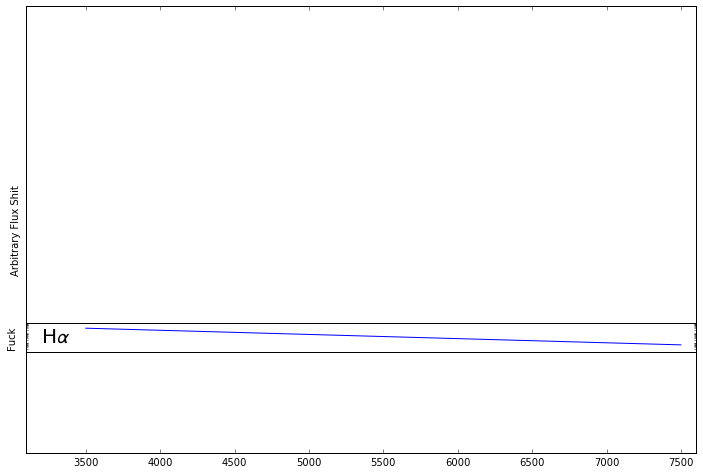

In [68]:
f = plt.figure(figsize=(12,8))
a = plt.subplot(111)

a.set_xlim(3100, 7600)
a.set_xticks(np.linspace(3500, 7500, 9))
a.set_ylabel('Arbitrary Flux Shit')

da = np.linspace(3500, 7500, 100)
y = np.exp(-(da * 1e-3))
sp = plt.axes([.125, .3, 0.775, 0.05])
sp.semilogy(da, y)
sp.set_xlim(3100, 7600)
sp.text(3200, 0.001, r'H$\alpha$', size=20)
sp.set_ylabel('Fuck')
plt.setp(sp.get_xticklines(), visible=False)
#sp.axis('off')

plt.setp(sp, xticks=[], yticks=[])
plt.setp(a.get_yticklabels(), visible=False)
plt.setp(a.get_yticklines(), visible=False)

plt.show()

In [123]:
np.asarray(spg.get_ylim())

0.080000000000000002